In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

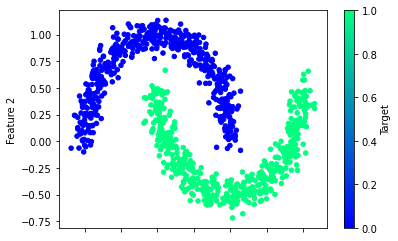

In [2]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split


In [4]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [14]:
# Create the Keras Sequential model
nn_mmodel = tf.keras.models.Sequential()
# Add our first Dense layer, including the input layer
nn_mmodel.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))
# Add the output layer that uses a probability activation function
nn_mmodel.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [6]:
# Compile the Sequential model together and customize metrics
nn_mmodel.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [7]:
# Training the model with the nonlinear data
model_moon = nn_mmodel.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 863us/step - loss: 0.6464 - accuracy: 0.6880
Epoch 2/100
24/24 [==============================] - 0s 896us/step - loss: 0.6395 - accuracy: 0.7187
Epoch 3/100
24/24 [==============================] - 0s 953us/step - loss: 0.6325 - accuracy: 0.7200
Epoch 4/100
24/24 [==============================] - 0s 954us/step - loss: 0.6256 - accuracy: 0.7333
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6183 - accuracy: 0.7387
Epoch 6/100
24/24 [==============================] - 0s 939us/step - loss: 0.6109 - accuracy: 0.7427
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6033 - accuracy: 0.7520
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5959 - accuracy: 0.7613
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.7640
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5812 - accuracy: 0.7667

24/24 [==============================] - 0s 822us/step - loss: 0.3031 - accuracy: 0.9000
Epoch 83/100
24/24 [==============================] - 0s 923us/step - loss: 0.3022 - accuracy: 0.9000
Epoch 84/100
24/24 [==============================] - 0s 758us/step - loss: 0.3013 - accuracy: 0.9000
Epoch 85/100
24/24 [==============================] - 0s 737us/step - loss: 0.3005 - accuracy: 0.9000
Epoch 86/100
24/24 [==============================] - 0s 736us/step - loss: 0.2996 - accuracy: 0.9000
Epoch 87/100
24/24 [==============================] - 0s 737us/step - loss: 0.2989 - accuracy: 0.9000
Epoch 88/100
24/24 [==============================] - 0s 801us/step - loss: 0.2981 - accuracy: 0.8987
Epoch 89/100
24/24 [==============================] - 0s 678us/step - loss: 0.2974 - accuracy: 0.8987
Epoch 90/100
24/24 [==============================] - 0s 701us/step - loss: 0.2967 - accuracy: 0.8973
Epoch 91/100
24/24 [==============================] - 0s 750us/step - loss: 0.2960 - accuracy: 

<AxesSubplot:>

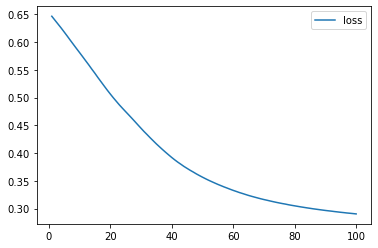

In [8]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

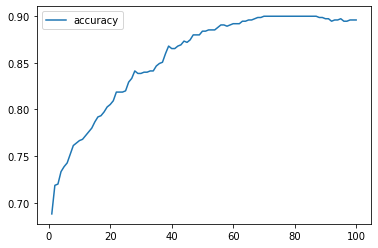

In [9]:

# Plot the accuracy
history_df.plot(y="accuracy")


In [10]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [17]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [18]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 824us/step - loss: 0.6975 - accuracy: 0.3747
Epoch 2/100
24/24 [==============================] - 0s 911us/step - loss: 0.6863 - accuracy: 0.4680
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.5307
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5307
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6440 - accuracy: 0.5307
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6224 - accuracy: 0.5307
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.5547
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5740 - accuracy: 0.8093
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5454 - accuracy: 0.8573
Epoch 10/100
24/24 [==============================] - ETA: 0s - loss: 0.4967 - accuracy: 0.96 - 0s 954us/

24/24 [==============================] - 0s 954us/step - loss: 0.1220 - accuracy: 0.9533
Epoch 83/100
24/24 [==============================] - 0s 867us/step - loss: 0.1184 - accuracy: 0.9547
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.9587
Epoch 85/100
24/24 [==============================] - 0s 954us/step - loss: 0.1109 - accuracy: 0.9627
Epoch 86/100
24/24 [==============================] - 0s 867us/step - loss: 0.1074 - accuracy: 0.9653
Epoch 87/100
24/24 [==============================] - 0s 867us/step - loss: 0.1041 - accuracy: 0.9680
Epoch 88/100
24/24 [==============================] - 0s 825us/step - loss: 0.1008 - accuracy: 0.9707
Epoch 89/100
24/24 [==============================] - 0s 955us/step - loss: 0.0976 - accuracy: 0.9733
Epoch 90/100
24/24 [==============================] - 0s 911us/step - loss: 0.0947 - accuracy: 0.9747
Epoch 91/100
24/24 [==============================] - 0s 737us/step - loss: 0.0922 - accuracy: 0.